# <u><b>Project title: Cardiovascular risk prediction</b></u>

---
PROJECT TYPE- **SUPERVISED ML (CLASSIFICATION)**


> CONTRIBUTION- TEAM


1.   NEHA JADHAV
2.   AKANKSHA JADHAV






**PROBLEM DESCRIPTION-**

Cardiovascular diseases (CVDs) are the leading cause of death globally, taking an estimated 18.6 million lives each year, which accounts for 33% of all the global deaths. CVDs are a group of disorders of the heart and blood vessels and include coronary heart disease, cerebrovascular disease, rheumatic heart disease and other conditions. More than four out of five CVD deaths are due to heart attacks and strokes, and one third of these deaths occur prematurely in people under 70 years of age.

It is important to detect cardiovascular disease as early as possible so that management with counselling and medicines can begin.

Our main aim here is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD).

### <b>**PROJECT DESCRIPTION**:</b>

The problem and aim stated above can be solved with the help of machine learning models and the data that we have. The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

### <b>Variables:</b>
Each attribute is a potential risk factor. These attributes include demographic, behavioral, and medical risk factors.

### <b>Defining the columns:</b>

### <b>Demographic:</b>

   • Sex: male or female("M" or "F")
  
   • Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

### <b>Behavioral:</b>
  
   • is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
  
   • Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

### <b>Medical( history):</b>

   • BP Meds: whether or not the patient was on blood pressure medication (Nominal)
   
   • Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
  
   • Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
  
   • Diabetes: whether or not the patient had diabetes (Nominal) 

### <b>Medical(current):</b>

   • Tot Chol: total cholesterol level (Continuous)
   
   • Sys BP: systolic blood pressure (Continuous)
   
   • Dia BP: diastolic blood pressure (Continuous)
   
   • BMI: Body Mass Index (Continuous)
   
   • Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
   
   • Glucose: glucose level (Continuous)

### <b>Predict variable (desired target):</b>

   • 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

##**GITHUB LINK:** 

##**IMPORTING AND LOADING THE DATA**

In [1]:
#Importing the LIBRARIES
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Loading the dataset
cvd_df=pd.read_csv('/content/drive/MyDrive/Capstone project-03/data_cardiovascular_risk.csv')

##**EXPLORATORY DATA ANALYSIS**

In [4]:
#Getting the first 10 rows of dataset
cvd_df.head(10)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
6,6,61,1.0,M,NO,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0
7,7,36,4.0,M,YES,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0
8,8,41,2.0,F,YES,20.0,NaN,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0
9,9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,NaN,0


In [5]:
#checking the last 10 rows of the dataset
cvd_df.tail(10)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3380,3380,56,1.0,F,YES,20.0,0.0,0,0,0,240.0,125.0,79.0,27.38,80.0,82.0,0
3381,3381,63,1.0,F,NO,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
3382,3382,43,4.0,M,NO,0.0,0.0,0,1,0,260.0,129.0,90.0,25.29,70.0,62.0,0
3383,3383,57,3.0,F,NO,0.0,0.0,0,0,0,210.0,131.0,85.0,26.59,70.0,77.0,0
3384,3384,61,1.0,F,NO,0.0,0.0,0,1,0,217.0,182.0,86.0,26.98,105.0,113.0,0
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [6]:
#checking the information of the dataset
cvd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [7]:
#Shape of the dataset
cvd_df.shape

(3390, 17)

We have 3,390 observations and 17 columns.

In [8]:
#checking the columns
cvd_df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [9]:
#description of the data in DataFrame
cvd_df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [10]:
#Checking the distribution of the target variable
cvd_df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [12]:
#A function to produce visualisations for gaining insights and doing analysis
def create_visualisation(col: str, factor :str = 'Diabetes', data : pd.DataFrame = cvd_df, t_col: str = 'TenYearCHD',\
                         vis_type: str= 'barplot',percent: bool = False):
  """A function that gives a visualisation which shows the
     effect of a  particular variable on the target variable. 
     Also checks for the impact percentage if specified by the user."""
  
  plt.figure(figsize=(12,10))

  #For Barplot visualisation
  if vis_type == 'barplot':
    analysis_df = data.groupby(col)[t_col].sum().reset_index()
    sns.barplot(data=analysis_df, x=col, y=t_col)
    plt.title(f'Distribution of positive cases of CHD over different categories of column {col.capitalize()}',size=18)
  
  #For Countplot visualisation
  if vis_type == 'countplot':
    sns.countplot(x=data[col],hue=data[t_col])
    plt.title(f'The effect of column {col.capitalize()} on the target column {t_col}',size=20)
    plt.legend(['No Risk','At Risk'])
  
  #For Lineplot visualisation
  if vis_type == 'lineplot':
    analysis_df = data.groupby(col)[t_col].sum().reset_index()
    plt.plot(analysis_df[col],analysis_df[t_col])
    plt.title(f'Distribution of positive cases of CHD over different values of column {col.capitalize()}',size=18)
  
  #General plot adjusting commands
  plt.xlabel(col.capitalize(),size=15)
  plt.ylabel(t_col,size=15)
  plt.show()
  
  #To calculate the impact percentage of a particular column
  if percent == True:
    analysis_df = data.groupby(col)[t_col].sum().reset_index()
    count_df = data[col].value_counts().reset_index()
    p = math.ceil(((analysis_df.loc[1][1]/count_df.loc[1][1]) - (analysis_df.loc[0][1]/count_df.loc[0][1]))*100)
    print(f'\nAnalysis result: \n{factor} increases the chances of a positive CHD risk factor by around {p}%')

### <b>Age group most likely to have a positive CHD risk factor.</b>

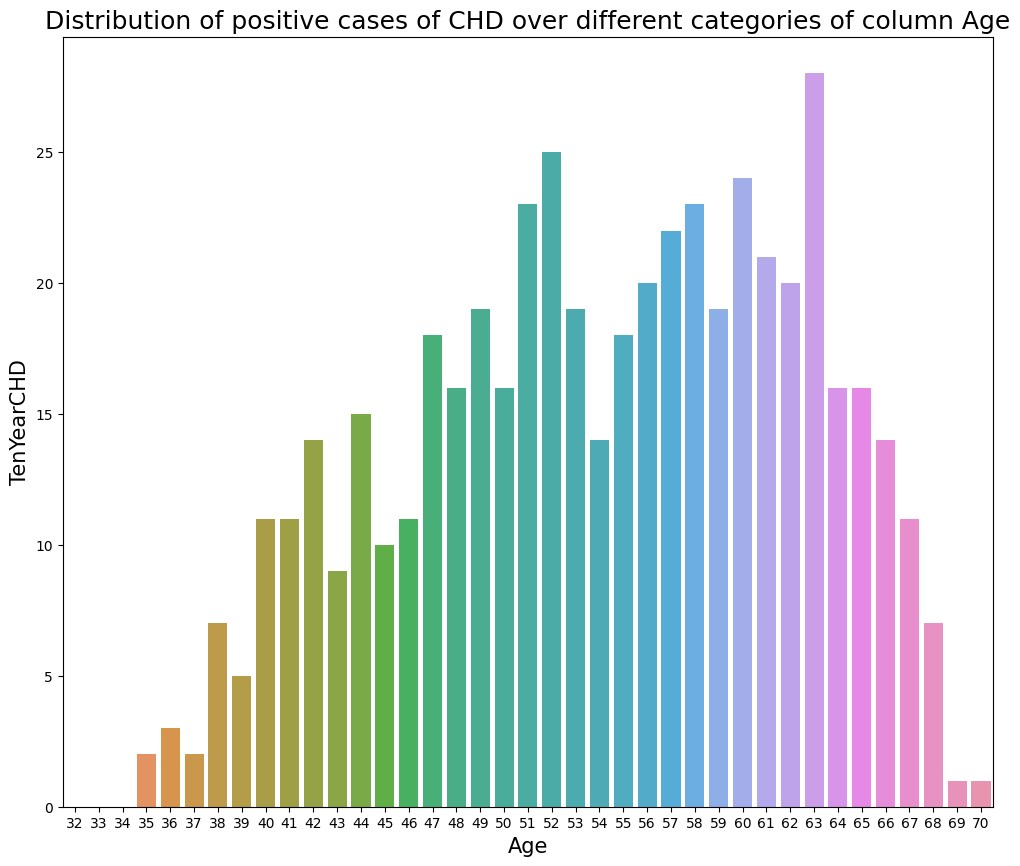

In [13]:
#Analysis of the column Age
create_visualisation(col='age')

<b>As we can see, the age group that is most likely to have a posititve CHD risk factor is from 47 to 65.</b>